In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr

In [2]:
# path to dataframes
path_to_dfs = "suggestion_2/forecasted_counts/block_0103"

In [3]:
# os.listdir(path_to_dfs)

In [4]:
len(os.listdir(path_to_dfs))

6370

In [5]:
6370/910

7.0

In [6]:
# seems each sub-window sequence have 7 things stored - what are all these?

# the forecasted npy files
# ar_sigma
# noise_sigma
# betas
# rho
# averaged forecasts
# posterior parameter summaries - might need to pay a little attention here, the r_hat values are too high - think this should vary around 1? - but almost all the values are greater than 2.

In [7]:
averaged_forecasts_csvs = []
for file in os.listdir(path_to_dfs):
    if file[:8] =='averaged':
        averaged_forecasts_csvs.append(file)

In [8]:
# how many csv files do we have?
len(averaged_forecasts_csvs)

910

In [9]:
# averaged_forecasts_csvs - we probably need these in order for getting the respective predicted values

In [10]:
averaged_forecasts_csvs[0]

'averaged_forecasts_sub_653.csv'

In [11]:
# sorting them would not work as everything in the nomenclature of the files is a character - hence will not respect the numerical order

In [12]:
# let's create these names in the order of the subwindows
ordered_csv_files = ['averaged_forecasts_sub_' + str(i) + '.csv' for i in range(910)]

In [13]:
# ordered_csv_files

In [14]:
# averaged_forecasts_csvs list is pointless at this time?

In [15]:
%%time
all_dfs = []
for file in ordered_csv_files:
    read_df = pd.read_csv(path_to_dfs + '/' + file)
    all_dfs.append(read_df)

CPU times: user 1.47 s, sys: 314 ms, total: 1.78 s
Wall time: 21.8 s


In [16]:
# make a single dataframe out of the many
combined_df = pd.concat(all_dfs, axis = 1)

In [17]:
combined_df.head()

,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,...,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value
0,0.0,-0.008622,0.0,-0.004020,0.0,-0.013600,0.0,-0.016808,0.000005,-0.003117,...,0.0,-0.007105,0.0,-0.012972,0.0,-0.008735,0.0,0.002620,0.0,0.005498
1,0.0,-0.003352,0.0,-0.001749,0.0,-0.005783,0.0,0.007102,0.064341,0.000372,...,0.0,0.000033,0.0,-0.001411,0.0,0.000213,0.0,0.000874,0.0,0.001592
2,0.0,-0.003265,0.0,-0.003800,0.0,-0.001575,0.0,0.001654,0.000000,-0.000544,...,0.0,-0.004479,0.0,-0.006052,0.0,-0.002207,0.0,-0.006147,0.0,-0.003249
3,0.0,-0.002662,0.0,-0.003518,0.0,0.004136,0.0,0.011356,0.000000,0.001134,...,0.0,-0.001618,0.0,0.006355,0.0,0.001497,0.0,-0.000994,0.0,0.003673
4,0.0,-0.003706,0.0,-0.004616,0.0,-0.001090,0.0,-0.006067,0.000000,0.001924,...,0.0,-0.002414,0.0,0.002233,0.0,0.002590,0.0,-0.004778,0.0,0.003327


In [18]:
combined_df.shape

(7, 1820)

In [19]:
# get the true values
True_values_df = combined_df[['True_value']]

In [20]:
True_values_df.head()

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.0,0.0,0.0,0.0,0.000005,0.000668,1.044816e-07,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.064341,0.087708,0.000000e+00,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.042056,1.144163e-02,0.0,0.0,0.0,...,0.0,7.683623e-10,0.000005,4.013955e-08,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,...,0.0,2.402785e-05,0.000649,8.526243e-09,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,...,0.0,7.268980e-04,0.003864,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
True_values_df.shape

(7, 910)

In [22]:
# get the proper counts?
exp_true = np.exp(True_values_df)-1

In [23]:
exp_true

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.0,0.0,0.0,0.0,5.458158e-06,0.000668,1.044816e-07,0.0,0.0,0.0,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,6.645597e-02,0.091669,0.000000e+00,0.0,0.0,0.0,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000e+00,0.042952,1.150733e-02,0.0,0.0,0.0,...,0.000000,7.683623e-10,0.000005,4.013955e-08,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,0.0,...,0.000000,2.402814e-05,0.000650,8.526243e-09,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,0.0,...,0.000000,7.271623e-04,0.003871,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,6.876971e-07,0.022043,5.086000e-04,0.0,0.0,0.0,...,0.000000,2.217396e-03,0.005884,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,0.0,...,0.022043,9.133409e-06,0.054010,4.412074e-04,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# sum the true values - since the sub images are not overlapping, we can get the sum across columns in the above dataframe
sum_true_values = exp_true.sum(axis = 1)

In [25]:
sum_true_values

0    40.000661
1    39.000002
2    41.000000
3    31.000000
4    32.000000
5    40.002086
6    27.000176
dtype: float64

In [26]:
# get the forecasted values
Forecasted_values_df = combined_df[['Forecasted_value']]

In [27]:
Forecasted_values_df.head()

,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,...,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value
0,-0.008622,-0.004020,-0.013600,-0.016808,-0.003117,0.095382,0.045459,0.036910,-0.004830,-0.003631,...,-0.006975,0.020388,-0.000016,0.006160,0.004799,-0.007105,-0.012972,-0.008735,0.002620,0.005498
1,-0.003352,-0.001749,-0.005783,0.007102,0.000372,0.086942,0.050358,0.029387,-0.000118,-0.006368,...,-0.002359,0.014716,0.013672,0.006646,-0.000384,0.000033,-0.001411,0.000213,0.000874,0.001592
2,-0.003265,-0.003800,-0.001575,0.001654,-0.000544,0.077602,0.056216,0.033716,-0.001760,-0.005804,...,-0.003766,0.019808,0.023486,0.001851,-0.002185,-0.004479,-0.006052,-0.002207,-0.006147,-0.003249
3,-0.002662,-0.003518,0.004136,0.011356,0.001134,0.084737,0.039150,0.039714,0.007798,-0.002904,...,-0.002133,0.005871,-0.008419,-0.015027,0.000346,-0.001618,0.006355,0.001497,-0.000994,0.003673
4,-0.003706,-0.004616,-0.001090,-0.006067,0.001924,0.092911,0.089849,0.015549,0.000755,-0.002149,...,0.002175,0.005437,-0.010796,-0.006548,0.005557,-0.002414,0.002233,0.002590,-0.004778,0.003327


In [28]:
exp_forecasted = np.exp(Forecasted_values_df)-1

In [29]:
exp_forecasted

,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,...,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value
0,-0.008585,-0.004012,-0.013508,-0.016668,-0.003112,0.100079,0.046508,0.037600,-0.004819,-0.003624,...,-0.006951,0.020598,-0.000016,0.006179,0.004810,-0.007080,-0.012889,-0.008697,0.002623,0.005513
1,-0.003347,-0.001747,-0.005767,0.007127,0.000373,0.090833,0.051647,0.029823,-0.000118,-0.006347,...,-0.002356,0.014825,0.013765,0.006668,-0.000384,0.000033,-0.001410,0.000213,0.000875,0.001594
2,-0.003259,-0.003793,-0.001574,0.001655,-0.000544,0.080693,0.057826,0.034291,-0.001758,-0.005788,...,-0.003759,0.020005,0.023764,0.001852,-0.002183,-0.004469,-0.006034,-0.002204,-0.006128,-0.003244
3,-0.002658,-0.003512,0.004145,0.011420,0.001135,0.088431,0.039927,0.040513,0.007829,-0.002900,...,-0.002131,0.005888,-0.008383,-0.014915,0.000346,-0.001616,0.006375,0.001498,-0.000994,0.003680
4,-0.003700,-0.004605,-0.001089,-0.006048,0.001926,0.097364,0.094009,0.015671,0.000756,-0.002147,...,0.002177,0.005452,-0.010738,-0.006526,0.005572,-0.002411,0.002235,0.002594,-0.004766,0.003333
5,-0.002841,-0.004445,0.007234,0.009438,0.003734,0.083782,0.064041,0.042502,0.007232,-0.000615,...,0.002111,0.018329,-0.003870,0.001013,-0.000258,0.000135,0.008076,0.001409,-0.003237,0.000980
6,-0.001492,0.000425,-0.000646,-0.002547,-0.000422,0.084026,0.008427,0.028524,0.003119,-0.000042,...,-0.000313,0.010703,-0.005131,-0.002758,-0.003988,-0.002416,0.003056,-0.000568,-0.002055,-0.000131


In [30]:
# set the values to 0 if the forecasted count is negative?

In [31]:
exp_forecasted[exp_forecasted < 0] = 0

In [32]:
exp_forecasted.head()

,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,...,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value
0,0.0,0.0,0.000000,0.000000,0.000000,0.100079,0.046508,0.037600,0.000000,0.0,...,0.000000,0.020598,0.000000,0.006179,0.004810,0.000000,0.000000,0.000000,0.002623,0.005513
1,0.0,0.0,0.000000,0.007127,0.000373,0.090833,0.051647,0.029823,0.000000,0.0,...,0.000000,0.014825,0.013765,0.006668,0.000000,0.000033,0.000000,0.000213,0.000875,0.001594
2,0.0,0.0,0.000000,0.001655,0.000000,0.080693,0.057826,0.034291,0.000000,0.0,...,0.000000,0.020005,0.023764,0.001852,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.0,0.004145,0.011420,0.001135,0.088431,0.039927,0.040513,0.007829,0.0,...,0.000000,0.005888,0.000000,0.000000,0.000346,0.000000,0.006375,0.001498,0.000000,0.003680
4,0.0,0.0,0.000000,0.000000,0.001926,0.097364,0.094009,0.015671,0.000756,0.0,...,0.002177,0.005452,0.000000,0.000000,0.005572,0.000000,0.002235,0.002594,0.000000,0.003333


In [33]:
sum_forecasted_values = exp_forecasted.sum(axis = 1)

In [34]:
sum_forecasted_values

0    21.526836
1    25.338087
2    27.422520
3    19.436150
4    17.969685
5    21.965814
6    18.875880
dtype: float64

In [35]:
# concatenate the sum dataframes
block_0103_true_and_forecasted_values_df = pd.concat((sum_true_values, sum_forecasted_values), axis = 1)

In [36]:
block_0103_true_and_forecasted_values_df.columns = ["True_count", "Forecasted_count"]

In [37]:
block_0103_true_and_forecasted_values_df

,True_count,Forecasted_count
0,40.000661,21.526836
1,39.000002,25.338087
2,41.000000,27.422520
3,31.000000,19.436150
4,32.000000,17.969685
5,40.002086,21.965814
6,27.000176,18.875880


In [38]:
# blockwise mean squared error
rmse = np.sqrt(mean_squared_error(sum_true_values, sum_forecasted_values))
rmse

14.313638471701374

In [39]:
# blockwise mean absolute error
mae = mean_absolute_error(sum_true_values, sum_forecasted_values)
mae

13.923993102180846

In [40]:
corr = pearsonr(sum_true_values, sum_forecasted_values)
corr

PearsonRResult(statistic=0.783994336038516, pvalue=0.03693327575016617)

In [41]:
r2 = r2_score(sum_true_values, sum_forecasted_values)
r2

-6.650940921398718

##### Coverages and widths for the forecasted values?

In [42]:
# Should we get the interval preds in the same thinking way too?

In [43]:
# maybe we should - so first convert to data scale before avearging, and see if the measures differ a lot

In [44]:
# for this we need the all_forecasts npy files

In [45]:
# content location is the same path as above

In [46]:
all_forecasts_npy_files = ['all_forecasts_sub_' + str(i) + '.npy' for i in range(910)]

In [47]:
# all_forecasts_npy_files

In [48]:
# load the npy files

In [49]:
%%time
loaded_npy_files = []
for file in all_forecasts_npy_files:
    joined_path = os.path.join(path_to_dfs, file)
    load_file = np.load(joined_path)
    # notice we are averaging the preds across the chains before exponentiation
    mean_file = np.exp(np.mean(load_file, axis = 1)) - 1
    loaded_npy_files.append(mean_file)

CPU times: user 828 ms, sys: 488 ms, total: 1.32 s
Wall time: 18.7 s


In [50]:
len(loaded_npy_files)

910

In [51]:
loaded_npy_files[0].shape

(1000, 7)

In [52]:
loaded_npy_files[0]

array([[-0.00901258, -0.00065106, -0.00195491, ..., -0.0009644 ,
         0.0008353 ,  0.00243044],
       [-0.00822181,  0.00031781, -0.00133431, ..., -0.00036073,
         0.00060463,  0.00162017],
       [-0.00863409, -0.00030988, -0.00121206, ..., -0.00140691,
         0.00031173,  0.00127518],
       ...,
       [-0.00639707, -0.00243479, -0.00292408, ..., -0.002352  ,
        -0.0002718 , -0.00139511],
       [-0.00617099, -0.00285178, -0.00273949, ..., -0.00199544,
        -0.00190312, -0.00112075],
       [-0.00466943, -0.00147235, -0.00274545, ..., -0.00077766,
         0.00015628, -0.00155425]], dtype=float32)

In [53]:
%%time
# convert less than 0 entries to 0 for all arrays
for arr in loaded_npy_files:
    arr[arr < 0] = 0

CPU times: user 22.6 ms, sys: 1.9 ms, total: 24.5 ms
Wall time: 23.6 ms


In [54]:
loaded_npy_files[0]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.0008353 ,
        0.00243044],
       [0.        , 0.00031781, 0.        , ..., 0.        , 0.00060463,
        0.00162017],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00031173,
        0.00127518],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00015628,
        0.        ]], dtype=float32)

In [55]:
# Since we do not have overlapping sub-windows, we can sum the counts to get the final densities
output = sum(loaded_npy_files)

In [56]:
output.shape

(1000, 7)

In [57]:
output

array([[31.400396, 30.299393, 36.923996, ..., 29.034386, 33.237934,
        27.64193 ],
       [25.091558, 30.692207, 35.457348, ..., 22.731222, 29.904833,
        29.777946],
       [32.43474 , 34.291706, 37.10489 , ..., 29.077883, 36.91828 ,
        31.034899],
       ...,
       [30.34501 , 31.753355, 35.069656, ..., 29.970139, 36.689144,
        39.03253 ],
       [29.173512, 30.830044, 37.037434, ..., 35.604347, 31.980108,
        31.267962],
       [30.870174, 32.920147, 35.401623, ..., 29.362686, 36.34338 ,
        30.810358]], dtype=float32)

In [58]:
# is this sum correct? alternative method of computing the sums
output_alt = np.sum(loaded_npy_files, axis = 0)

In [59]:
output_alt.shape

(1000, 7)

In [60]:
output_alt

array([[31.400396, 30.299393, 36.923996, ..., 29.034386, 33.237934,
        27.64193 ],
       [25.091558, 30.692207, 35.457348, ..., 22.731222, 29.904833,
        29.777946],
       [32.43474 , 34.291706, 37.10489 , ..., 29.077883, 36.91828 ,
        31.034899],
       ...,
       [30.34501 , 31.753355, 35.069656, ..., 29.970139, 36.689144,
        39.03253 ],
       [29.173512, 30.830044, 37.037434, ..., 35.604347, 31.980108,
        31.267962],
       [30.870174, 32.920147, 35.401623, ..., 29.362686, 36.34338 ,
        30.810358]], dtype=float32)

In [61]:
np.mean(output_alt == output)

1.0

In [62]:
# verified the sum is correct, let's get the widths and the coverages - and also any essential plots

In [63]:
# now we can get the 2.5th abd the 97.5th percentiles - to get the coverage and the widths of the CIS
li_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[0,:].reshape(-1,1)    
ui_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[1,:].reshape(-1,1)

In [64]:
li_train

array([[20.75166984],
       [22.68757911],
       [22.81007876],
       [17.75576682],
       [17.61131787],
       [19.63968916],
       [18.48609934]])

In [65]:
ui_train

array([[37.72680378],
       [41.10635519],
       [44.0154006 ],
       [39.08450537],
       [37.55361223],
       [41.60724297],
       [38.87409954]])

In [66]:
width_train = ui_train - li_train
avg_width_train = width_train.mean(0)[0]

In [67]:
avg_width_train

20.03225982529776

In [68]:
y_traina = block_0103_true_and_forecasted_values_df[["True_count"]].values

In [69]:
ind_train = (y_traina >= li_train) & (y_traina <= ui_train)
coverage_train= ind_train.mean(0)[0]

In [70]:
coverage_train

0.8571428571428571

In [71]:
np.mean(output, axis = 0)

array([28.485115, 31.154804, 32.723938, 27.69168 , 25.967222, 29.362005,
       27.493525], dtype=float32)

In [72]:
# sum_forecasted_values

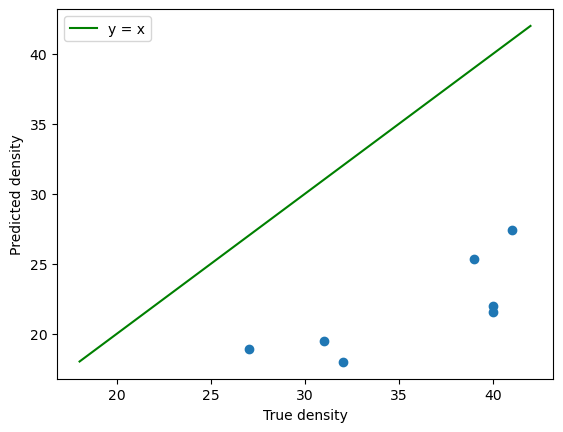

In [76]:
plt.scatter(block_0103_true_and_forecasted_values_df['True_count'], block_0103_true_and_forecasted_values_df['Forecasted_count'])
plt.xlabel("True density")
plt.ylabel("Predicted density")
# Add the y = x line
plt.plot([18, 42], [18, 42], color='green', label='y = x')
plt.legend()
plt.show()

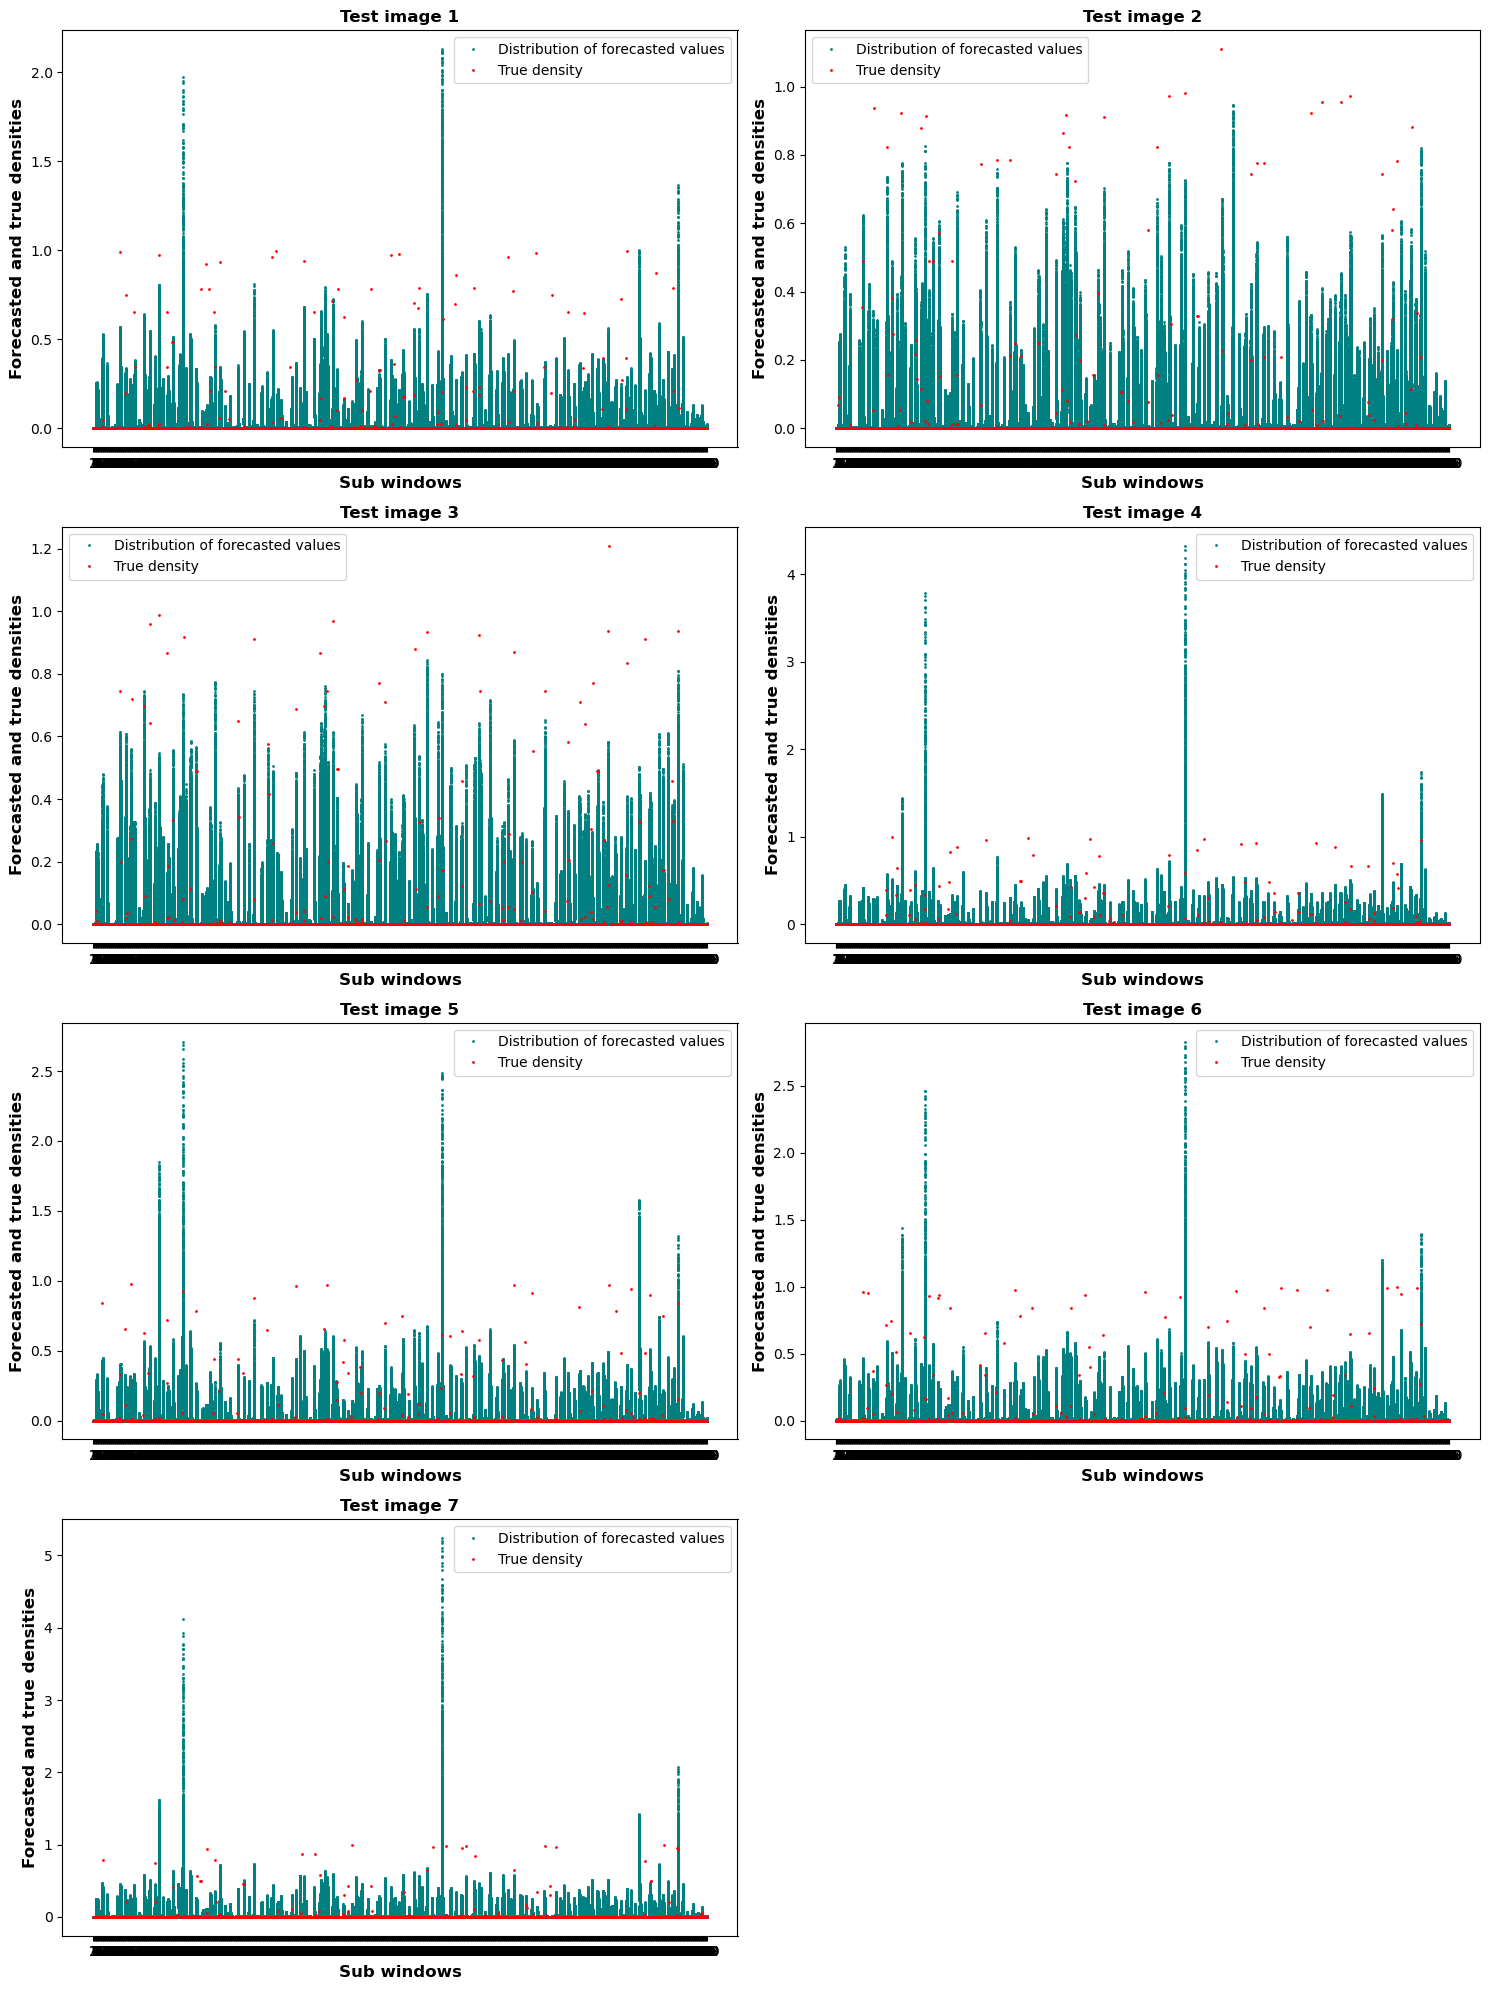

CPU times: user 26.1 s, sys: 871 ms, total: 27 s
Wall time: 26.7 s


In [74]:
%%time
# Create a 2x4 grid of subplots (total 8 plots, the last one will be left empty)
fig, axes = plt.subplots(4, 2, figsize=(15,20))
axes = axes.flatten() 

# widths plots
for i in range(7):
    timestep_i_subwindows = []
    for y, file in enumerate(loaded_npy_files):
        t_i_forecast = file[:,i]
        # print the shape of the extracted array
        # print(t_i_forecast.shape)
        timestep_i_subwindows.append(t_i_forecast)
    stacked_forecasts = np.stack(timestep_i_subwindows)
    stacked_forecasts[stacked_forecasts<0] = 0
    sorted_stacked_forecasts = np.sort(stacked_forecasts, axis = 1)
    # get the values between the 2.5th and 97.5th percentile?
    sorted_interval_data = sorted_stacked_forecasts[:,25:975]

    # Plot for the current 2D array
    for l, row in enumerate(sorted_interval_data):
        axes[i].plot([l + 1] * len(row), row, 'o', markersize=1, color='teal', label='Distribution of forecasted values' if l == 0 else "")
    
    true_counts = exp_true.iloc[i,:].values

    # # Overlay the 1D array values
    axes[i].plot(np.arange(1, 911), true_counts, 'o', markersize=1, color='red', label='True density')
    
    # Customize x-ticks and labels
    axes[i].set_xticks(np.arange(1, 911))
    # axes[i].set_xticklabels([f'sub_window_{zz + 1}' for zz in range(910)], rotation=90, fontsize=13)
    axes[i].set_xlabel("Sub windows", fontsize=12, fontweight='bold')
    axes[i].set_ylabel("Forecasted and true densities", fontsize=12, fontweight='bold')
    axes[i].set_title(f"Test image {i + 1}", fontsize=12, fontweight='bold')
    axes[i].legend()


# Hide the last (empty) subplot
axes[-1].set_visible(False)

# Adjust layout
plt.tight_layout()

# # Save the figure as a PDF file
# plt.savefig("Previous_data/Forecasted_distributions_blk13.pdf", format='pdf', bbox_inches='tight')
plt.show()



In [75]:
# plots are going to be too over-crowded as we now have 910 subwindows - might beed to talk to Dr. Ghosh to figure out a better way to give these plots